In [27]:
train_df = []
train = []
highlights = []
new_train = []
new_highlights = []

In [2]:
import layer
import pandas as pd
import numpy as np
from tqdm import tqdm

# Data Preprocessing
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

import re
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import torch

[nltk_data] Downloading package punkt to
[nltk_data]     D:\Users\tara0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     D:\Users\tara0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
D:\Users\tara0\anaconda3\envs\lign167\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
with tqdm() as bar:
    train_df = pd.read_csv('cnn_dailymail/train.csv', skiprows=lambda x: bar.update(1) and False)
train_df.pop('id')
train_df.head(3)
#train_df = train_df[:50000]

287114it [02:59, 1598.72it/s] 


,article,highlights
0,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."


In [5]:
print(len(train_df))
print(train_df['article'][0])
print(train_df['highlights'][0])

287113
By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through contaminated food while attending a conference for newly ord

In [7]:
# Text Preprocessing
contraction_mapping = {"ain't": "is not", "aren't": "are not",\
                       "can't": "cannot", "'cause": "because",\
                       "could've": "could have", \
                       "couldn't": "could not","didn't": "did not",\
                       "doesn't": "does not", "don't": "do not",\
                       "hadn't": "had not", "hasn't": "has not",\
                       "haven't": "have not","he'd": "he would",\
                       "he'll": "he will", "he's": "he is", \
                       "how'd": "how did", "how'd'y": "how do you",\
                       "how'll": "how will", "how's": "how is",\
                       "I'd": "I would", "I'd've": "I would have", \
                       "I'll": "I will", "I'll've": "I will have",\
                       "I'm": "I am", "I've": "I have", \
                       "i'd": "i would","i'd've": "i would have",\
                       "i'll": "i will",  "i'll've": "i will have",\
                       "i'm": "i am", "i've": "i have", \
                       "isn't": "is not", "it'd": "it would",\
                       "it'd've": "it would have", "it'll": "it will",\
                       "it'll've": "it will have","it's": "it is",\
                       "let's": "let us", "ma'am": "madam",\
                       "mayn't": "may not", "might've": "might have",\
                       "mightn't": "might not","mightn't've": "might not have",\
                       "must've": "must have","mustn't": "must not",\
                       "mustn't've": "must not have",\
                       "needn't": "need not", "needn't've": "need not have",\
                       "o'clock": "of the clock","oughtn't": "ought not",\
                       "oughtn't've": "ought not have", "shan't": "shall not",\
                       "sha'n't": "shall not", "shan't've": "shall not have",\
                       "she'd": "she would", "she'd've": "she would have",\
                       "she'll": "she will", "she'll've": "she will have",\
                       "she's": "she is","should've": "should have",\
                       "shouldn't": "should not", "shouldn't've": "should not have",\
                       "so've": "so have","so's": "so as","this's": "this is",\
                       "that'd": "that would", "that'd've": "that would have",\
                       "that's": "that is", "there'd": "there would",\
                       "there'd've": "there would have", "there's": "there is",\
                       "here's": "here is","they'd": "they would",\
                       "they'd've": "they would have","they'll": "they will",\
                       "they'll've": "they will have", "they're": "they are",\
                       "they've": "they have", "to've": "to have",\
                       "wasn't": "was not", "we'd": "we would",\
                       "we'd've": "we would have", "we'll": "we will",\
                       "we'll've": "we will have", "we're": "we are",\
                       "we've": "we have", "weren't": "were not", \
                       "what'll": "what will", "what'll've": "what will have",\
                       "what're": "what are","what's": "what is",\
                       "what've": "what have", "when's": "when is",\
                       "when've": "when have", "where'd": "where did",\
                       "where's": "where is","where've": "where have",\
                       "who'll": "who will", "who'll've": "who will have",\
                       "who's": "who is", "who've": "who have",\
                       "why's": "why is", "why've": "why have",\
                       "will've": "will have", "won't": "will not",\
                       "won't've": "will not have","would've": "would have",\
                       "wouldn't": "would not", "wouldn't've": "would not have",\
                       "y'all": "you all","y'all'd": "you all would",\
                       "y'all'd've": "you all would have","y'all're": "you all are",\
                       "y'all've": "you all have","you'd": "you would",\
                       "you'd've": "you would have", "you'll": "you will",\
                       "you'll've": "you will have","you're": "you are",\
                       "you've": "you have"}



stop_words = set(stopwords.words('english'))

def clean_text(text):
    sentences = []
    
    for sentence in tqdm(text):
        # Lowercase
        sentence = sentence.lower()

        # Remove word between () and []
        sentence = re.sub("[\(\[].*?[\)\]]", "", sentence)

        # Transforming contraction
        sent = []
        for word in sentence.split(" "):
            if word in contraction_mapping:
                sent.append(contraction_mapping[word])
            else:
                sent.append(word)
        sentence = ' '.join(sent) 

        # Removing apostrophe
        sentence = re.sub(r"'s\b","",sentence)

        # Removing special characters 
        sentence = re.sub("[^a-zA-Z0-9]", " ", sentence)
        sentence = re.sub(r'https?:\/\/.*[\r\n]*', '', sentence, flags=re.MULTILINE)
        sentence = re.sub(r'\<a href', ' ', sentence)
        sentence = re.sub(r'&amp;', '', sentence) 
        sentence = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', sentence)
        sentence = re.sub(r'<br />', ' ', sentence)
        sentence = re.sub(r'\'', ' ', sentence)
        
        
        #sentence = ' '.join([contraction_mapping[t] if t in contraction_mapping      else t for t in sentence.split(" ")])
        # Remove stop words
        """sent = []
        for word in sentence.split(" "):
            if word not in stop_words:
                sent.append(word)            
        sent = ' '.join(sent)""" 

        # Remove short words
        """sent = []
        for word in sentence.split(" "):
            if len(word)>3:
                sent.append(word)
        sentence = ' '.join(sent) """

        #sentences.append(word_tokenize(sentence))
        sentence = re.sub("\n", '', sentence)
        sentences.append(sentence)

    return sentences
    

In [8]:
train = clean_text(train)


# Remove double space
temp = []
for sentence in tqdm(train):
    s_temp = []
    for word in sentence.split(' '):
        if word != '':
            s_temp.append(word)
    temp.append(s_temp)
    del s_temp

train = []
for i in temp:
    train.append(' '.join(i))

del temp
del train_df['article']

highlights = clean_text(highlights)

temp = []
for sentence in tqdm(highlights):
    s_temp = []
    for word in sentence.split(' '):
        if word != '':
            s_temp.append(word)
    temp.append(s_temp)
    del s_temp

highlights = []
for i in temp:
    highlights.append(' '.join(i))
    
del temp
del train_df['highlights']
#yo = ' '.join(temp)    
print(train[0])
print(train[0].split(" "))
print(highlights[0])
print(highlights[0].split(" "))


print(train[0])
print(highlights[0])

print(len(train))
print(len(highlights))

100%|██████████| 5956/5956 [00:00<00:00, 110306.24it/s]

by associated press published 14 11 est 25 october 2013 updated 15 36 est 25 october 2013 the bishop of the fargo catholic diocese in north dakota has exposed potentially hundreds of church members in fargo grand forks and jamestown to the hepatitis a virus in late september and early october the state health department has issued an advisory of exposure for anyone who attended five churches and took communion bishop john folda of the fargo catholic diocese in north dakota has exposed potentially hundreds of church members in fargo grand forks and jamestown to the hepatitis a state immunization program manager molly howell says the risk is low but officials feel it is important to alert people to the possible exposure the diocese announced on monday that bishop john folda is taking time off after being diagnosed with hepatitis a the diocese says he contracted the infection through contaminated food while attending a conference for newly ordained bishops in italy last month symptoms of 

100%|██████████| 50000/50000 [00:00<00:00, 255053.51it/s]


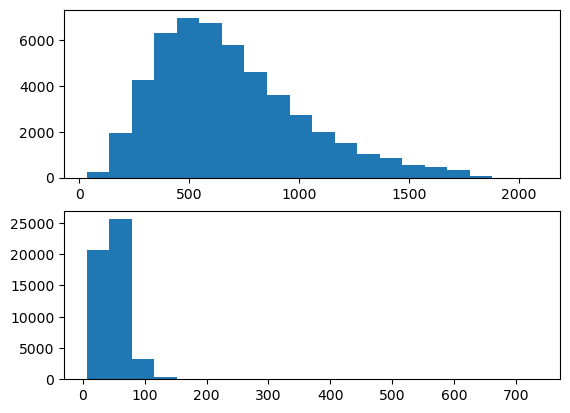

In [7]:
import matplotlib.pyplot as plt
text_word_count = []
highlights_word_count = []

# populate the lists with sentence lengths
for i in tqdm(train):
    temp=i.split()
    text_word_count.append(len(temp))

for j in tqdm(highlights):
    temp1=j.split()
    highlights_word_count.append(len(temp1))

"""length_df = pd.DataFrame({'text':text_word_count, 'headline':headline_word_count})
length_df.hist(bins = 30,range=[0,1000])"""
plt.figure(1)
plt.subplot(211)
plt.hist(text_word_count, bins=20)
plt.subplot(212)
plt.hist(highlights_word_count, bins=20)
plt.show()

del text_word_count
del highlights_word_count

In [5]:
# We can see that most of the highlights 
# and text lenth are in those range
maxlen_text = 200
MAX_LENGTH = maxlen_text
maxlen_summ = 50

cnt=0
for i in train:
    if(len(i.split())<=maxlen_text):
        cnt=cnt+1
print(cnt/len(train))

cnt=0
for i in highlights:
    if(len(i.split())<=maxlen_summ):
        cnt=cnt+1
print(cnt/len(train))

cnt=0
for i in range(len(highlights)):
    if(len(highlights[i].split())<=maxlen_summ and len(train[i].split())<=maxlen_text):
        cnt=cnt+1
print(cnt/len(train))

ZeroDivisionError: division by zero

In [6]:
# --- We only keep the corresponding dataset ---
# 50/150 for fast training
# 75/ 1000 for 75% of the dataset
maxlen_text = 200
MAX_LENGTH = maxlen_text
maxlen_summ = 50
new_train = []
new_highlights = []

for i in tqdm(range(len(train_df))):
    if len(train_df['highlights'][i].split())<=maxlen_summ and len(train_df['article'][i].split())<=MAX_LENGTH:
        new_train.append(train_df['article'][i])
        new_highlights.append(train_df['highlights'][i])

print(len(train))
print(len(new_train))
print(new_train[0])

"""del train
del highlights"""

train = new_train
highlights = new_highlights

print(len(train))
print(len(highlights))


100%|██████████| 287113/287113 [00:17<00:00, 16828.77it/s]

0
5956
By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through contaminated food while attending a conference for newly ord

In [ ]:
"""# Split the data
from sklearn.model_selection import train_test_split

train,t_train,highlights,t_highlights=train_test_split(train,highlights,test_size=0.3,random_state=0,shuffle=True) 

print(len(train))
print(len(t_train))"""

In [ ]:
# 3 variables
# input_lang, output_lang and pairs
# PrepareData -> readLand       
#             -> .addSentence
#
# readLand -> create Land for input and output and create pairs

In [9]:
# Add Start and End tokens
train_input = []
train_target = []
i=0
for sentence in tqdm(train):
    train_input.append(word_tokenize(sentence))
    """print(i)
    if i == 547 or i == 548 or i == 549:
        print(word_tokenize(sentence))
        print(sentence)
    i+=1"""
    
    
for sentence in tqdm(highlights):
    #sentence = "<SOS>" + sentence + "<EOS>"
    train_target.append(word_tokenize(sentence))

# Add start and end tokens
for sentence in train_input:
    #sentence.insert(0,'<SOS>')
    sentence.append('<EOS>')
for sentence in train_target:
    #sentence.insert(0,'<SOS>')
    sentence.append('<EOS>')
    
print(train_input[0])
print(train_target[0])
print(len(train_input))
print(len(train_target))

100%|██████████| 5956/5956 [00:16<00:00, 362.85it/s] 

['by', 'associated', 'press', 'published', '14', '11', 'est', '25', 'october', '2013', 'updated', '15', '36', 'est', '25', 'october', '2013', 'the', 'bishop', 'of', 'the', 'fargo', 'catholic', 'diocese', 'in', 'north', 'dakota', 'has', 'exposed', 'potentially', 'hundreds', 'of', 'church', 'members', 'in', 'fargo', 'grand', 'forks', 'and', 'jamestown', 'to', 'the', 'hepatitis', 'a', 'virus', 'in', 'late', 'september', 'and', 'early', 'october', 'the', 'state', 'health', 'department', 'has', 'issued', 'an', 'advisory', 'of', 'exposure', 'for', 'anyone', 'who', 'attended', 'five', 'churches', 'and', 'took', 'communion', 'bishop', 'john', 'folda', 'of', 'the', 'fargo', 'catholic', 'diocese', 'in', 'north', 'dakota', 'has', 'exposed', 'potentially', 'hundreds', 'of', 'church', 'members', 'in', 'fargo', 'grand', 'forks', 'and', 'jamestown', 'to', 'the', 'hepatitis', 'a', 'state', 'immunization', 'program', 'manager', 'molly', 'howell', 'says', 'the', 'risk', 'is', 'low', 'but', 'officials', 

In [11]:
word_to_ix = {'text': {'<SOS>':0, '<EOS>':1}, 'highlights': {'<SOS>':0, '<EOS>':1}}
ix_to_word = {'text': {0: '<SOS>', 1:'<EOS>'}, 'highlights': {0: '<SOS>', 1:'<EOS>'}}
num_unique_words = 2
# Create a dict of unique number for each unique word
for sent in train_input:
    for word in sent:
        if word not in word_to_ix['text']:
            word_to_ix['text'][word] = num_unique_words
            ix_to_word['text'][num_unique_words] = word
            num_unique_words += 1
num_unique_words = 2
for sent in train_target:
    for word in sent:
        if word not in word_to_ix['highlights']:
            word_to_ix['highlights'][word] = num_unique_words
            ix_to_word['highlights'][num_unique_words] = word
            num_unique_words += 1
            
#print(word_to_ix)
#print(word_to_ix['text'])
#print(word_to_ix['highlights'])
print(len(word_to_ix['text']))
print(len(word_to_ix['highlights']))
#print(ix_to_word)
del train
train = []
for sentence in train_input:
    train.append(' '.join(sentence))

del highlights 
highlights = []
for sentence in train_target:
    highlights.append(' '.join(sentence))
    


38446
19177


In [12]:
# Split the data
from sklearn.model_selection import train_test_split

train,t_train,highlights,t_highlights=train_test_split(train,highlights,test_size=0.3,random_state=0,shuffle=True) 

print(len(train))
print(len(highlights))
print(len(t_train))
print(len(t_highlights))

4169
4169
1787
1787


In [13]:
# Model taken from Pytorch
# https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        
        self.hidden = hidden_size
        self.embed = nn.Embedding(input_size, hidden_size)
        
        self.gru = nn.GRU(hidden_size, hidden_size)
        
    # Forward function
    def forward(self, input, hidden):
        embed = self.embed(input).view(1,1,-1)
        output = embed
        # Get result from gru
        output, hidden = self.gru(output, hidden)
        
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1,1,self.hidden, device=device)
    
class Decoder(nn.Module):
    def __init__(self, output_size, hidden_size):
        super(Decoder, self).__init__()
        
        self.hidden = hidden_size
        self.embed = nn.Embeddingt(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.linear = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    # Forward function
    def forward(self, input, hidden):
        embed = self.embed(input).view(1,1,-1)
        output = F.relu(embed)
        output, hidden = self.gru(output, hidden)
        output = self.linear(output[0])
        output = self.softmax(output)
        
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1,1,self.hidden_size, device=device)
        
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        #print("You guys called me ?")
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

In [14]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [15]:
teacher_forcing_ratio = 0.5
def training(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden, device=device)

    loss = 0
    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]
    
    decoder_input = torch.tensor([[0]], device=device)

    decoder_hidden = encoder_hidden

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False
    
    if use_teacher_forcing:
        # Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            #print("Test1")
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            #print("Test2")
            loss += criterion(decoder_output, target_tensor[di])
            # Teacher forcing
            decoder_input = target_tensor[di]  
            
    
    else:
        # Without teacher forcing
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach() 

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == 1:
                break
    
    # Backward
    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

def test(encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    encoder_hidden = encoder.initHidden()
    """
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()
    """
    loss_total = 0
    ITE = 10
    testing_pairs = [tensorsFromPair(random.choice(t_pairs))
                      for i in tqdm(range(ITE))]
    
    for i in range(0, len(testing_pairs)):
    
        testing_pair = testing_pairs[i - 1]
        input_tensor = testing_pair[0]
        target_tensor = testing_pair[1]
        
        input_length = input_tensor.size(0)
        target_length = target_tensor.size(0)
        
        if(input_length > MAX_LENGTH):
            print(input_length)
            ITE -= 1
            continue

        encoder_outputs = torch.zeros(max_length, encoder.hidden, device=device)

        loss = 0
        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(
                input_tensor[ei], encoder_hidden)
            encoder_outputs[ei] = encoder_output[0, 0]

        decoder_input = torch.tensor([[0]], device=device)

        decoder_hidden = encoder_hidden

        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # detach from history as input

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == 1:
                break
                
        loss_total += loss.item() / target_length

    return loss_total / ITE

def trainIters(encoder, decoder, n_iters, print_every=1000, test_every=100, learning_rate=0.01):
    print("Training...")
    print("Will print every: " + str(print_every))
    start = time.time()
    losses = []
    losses_av = []
    test_loss = []
    ITE = print_every
    print_loss_total = 0  # Reset every print_every

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    
    print("Taking random pairs")
    training_pairs = [tensorsFromPair(random.choice(pairs))
                      for i in tqdm(range(n_iters))]
    criterion = nn.NLLLoss()

    print("Start Training...")
    for i in tqdm(range(1, n_iters + 1)):
        if i % 1000 == 0:
            print(i,"/",n_iters + 1)
        
        training_pair = training_pairs[i - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]
        
        input_length = input_tensor.size(0)
        if(input_length > MAX_LENGTH):
            print(input_length)
            continue
        loss = training(input_tensor, target_tensor, encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion)
        print_loss_total += loss
        #losses.append(loss)
        if i % print_every == 0:
            print("we print")
            print_loss_avg = print_loss_total / print_every
            losses_av.append(print_loss_avg)
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, i / n_iters),
                                         i, i / n_iters * 100, print_loss_avg))

        if i % test_every == 0:
            print("We test")
            test_loss.append(test(encoder,
                     decoder, encoder_optimizer, decoder_optimizer, criterion))

    return losses, losses_av, test_loss

In [16]:
def indexesFromSentence(id, sentence):    
    #print(id)
    #print(word_to_ix[id])
    return [word_to_ix[id][word] for word in sentence.split(' ')]


def tensorFromSentence(id, sentence):
    #print(sentence)
    indexes = indexesFromSentence(id, sentence)
    #print(indexes)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)


def tensorsFromPair(pair):
    #print(" -- Pair --")
    input_tensor = tensorFromSentence('text', pair[0])
    target_tensor = tensorFromSentence('highlights', pair[1])
    return (input_tensor, target_tensor)

In [17]:
pairs = []
    
# Create the Pairs
print("Preparing the Data")
print(len(train))
for i in tqdm(range(len(train))):
    pairs.append([train[i], highlights[i]])

del train
del highlights

t_pairs = []
# Create the Test Pairs
print("Preparing the Data")
print(len(t_train))
for i in tqdm(range(len(t_train))):
    t_pairs.append([t_train[i], t_highlights[i]])

del t_train
del t_highlights

print(len(pairs))
print(len(t_pairs))

Preparing the Data
4169


100%|██████████| 4169/4169 [00:00<00:00, 1041580.50it/s]


Preparing the Data
1787


100%|██████████| 1787/1787 [00:00<00:00, 894097.73it/s]

4169
1787


In [20]:
import random
#MAX_LENGTH = 1000
hidden_size = 100
#print(word_to_ix['highlights'])
#print(len(word_to_ix['highlights']))
# input_lang.n_words -> input size (total number of words)
#                       size of word_to_ix
# output_lang.n_words -> output size (same ? or different ?) 
#                        or maybe we need word_to_ix for summary ?
encoder1 = Encoder(len(word_to_ix['text']), hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, len(word_to_ix['highlights']), dropout_p=0.1).to(device)


loss, loss_av, loss_test = trainIters(encoder1, attn_decoder1, 1000, print_every=99, test_every=99, learning_rate = 0.001)
#print(loss)

Training....
Will print every: 99
Taking random pairs


100%|██████████| 1000/1000 [00:00<00:00, 7874.16it/s]


Start Training...


  0%|          | 1/1000 [00:02<41:06,  2.47s/it]

203


  0%|          | 5/1000 [00:09<30:16,  1.83s/it]

201


  3%|▎         | 29/1000 [01:09<45:54,  2.84s/it]

207


  4%|▍         | 43/1000 [01:43<41:57,  2.63s/it]

202


  7%|▋         | 67/1000 [02:53<42:13,  2.72s/it]

201


  7%|▋         | 70/1000 [02:59<35:30,  2.29s/it]

203


 10%|▉         | 98/1000 [04:08<39:59,  2.66s/it]

we print
4m 11s (- 38m 6s) (99 9%) 8.8358
We test



100%|██████████| 10/10 [00:00<00:00, 4996.79it/s]


205


 10%|▉         | 99/1000 [04:12<45:16,  3.02s/it]

202
203


 11%|█         | 108/1000 [04:30<35:47,  2.41s/it]

203


 15%|█▌        | 152/1000 [06:21<38:43,  2.74s/it]

208


 17%|█▋        | 166/1000 [06:55<36:21,  2.62s/it]

206


 19%|█▉        | 194/1000 [08:02<30:53,  2.30s/it]

203


 20%|█▉        | 197/1000 [08:06<26:09,  1.95s/it]

we print
8m 8s (- 32m 59s) (198 19%) 8.9797
We test



 21%|██        | 206/1000 [08:31<35:44,  2.70s/it]

203


 21%|██        | 209/1000 [08:36<30:28,  2.31s/it]

201


 26%|██▌       | 262/1000 [10:40<29:31,  2.40s/it]

204


 30%|██▉       | 296/1000 [11:59<28:09,  2.40s/it]

we print
12m 1s (- 28m 27s) (297 29%) 8.7674
We test



 38%|███▊      | 377/1000 [15:14<26:13,  2.53s/it]

201


 38%|███▊      | 381/1000 [15:22<23:28,  2.27s/it]

206


 39%|███▉      | 388/1000 [15:37<23:48,  2.33s/it]

204


 40%|███▉      | 395/1000 [15:51<22:59,  2.28s/it]

we print
15m 54s (- 24m 15s) (396 39%) 8.3132
We test



100%|██████████| 10/10 [00:00<00:00, 3333.31it/s]


203


 40%|███▉      | 396/1000 [15:55<26:18,  2.61s/it]

203


 44%|████▎     | 437/1000 [17:38<23:27,  2.50s/it]

203


 46%|████▌     | 461/1000 [18:36<24:11,  2.69s/it]

203


 47%|████▋     | 467/1000 [18:49<22:40,  2.55s/it]

204


 48%|████▊     | 478/1000 [19:14<21:52,  2.52s/it]

205


 49%|████▉     | 494/1000 [19:55<23:47,  2.82s/it]

we print
19m 57s (- 20m 21s) (495 49%) 7.9695
We test



 52%|█████▏    | 520/1000 [21:00<20:50,  2.61s/it]

202


 59%|█████▉    | 593/1000 [24:03<18:29,  2.73s/it]

we print
24m 6s (- 16m 28s) (594 59%) 8.0974
We test



 61%|██████    | 611/1000 [24:55<18:00,  2.78s/it]

201


 61%|██████▏   | 614/1000 [25:00<14:29,  2.25s/it]

208


 67%|██████▋   | 670/1000 [27:10<13:22,  2.43s/it]

204


 67%|██████▋   | 672/1000 [27:12<10:12,  1.87s/it]

204


 69%|██████▉   | 692/1000 [27:56<11:40,  2.27s/it]

we print
27m 58s (- 12m 23s) (693 69%) 7.5666
We test



 69%|██████▉   | 693/1000 [27:59<12:43,  2.49s/it]

203


 78%|███████▊  | 780/1000 [31:07<07:08,  1.95s/it]

203


 79%|███████▉  | 791/1000 [31:32<09:36,  2.76s/it]

we print
31m 35s (- 8m 17s) (792 79%) 7.5843
We test



 82%|████████▏ | 818/1000 [32:40<08:26,  2.78s/it]

201


 89%|████████▉ | 889/1000 [35:17<04:06,  2.22s/it]

207
we print
35m 20s (- 4m 19s) (891 89%) 7.7543
We test



 90%|████████▉ | 897/1000 [35:33<03:37,  2.11s/it]

203


 90%|█████████ | 900/1000 [35:38<03:04,  1.85s/it]

208


 91%|█████████ | 912/1000 [36:02<03:03,  2.09s/it]

208


 93%|█████████▎| 928/1000 [36:34<02:44,  2.29s/it]

204


 98%|█████████▊| 983/1000 [38:37<00:41,  2.42s/it]

202


 99%|█████████▉| 989/1000 [38:49<00:25,  2.28s/it]

we print
38m 51s (- 0m 23s) (990 99%) 7.3939
We test



100%|█████████▉| 999/1000 [39:12<00:02,  2.17s/it]

1000 / 1001


100%|██████████| 1000/1000 [39:15<00:00,  2.36s/it]


In [21]:
print(MAX_LENGTH)
print(loss)
print(loss_av)
print(loss_test)

"""import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt"""
"""plt.plot(loss_av)
plt.plot(loss_test)
plt.show()"""

"""torch.save(encoder1.state_dict(), "encoder1_same_output.pt")
torch.save(attn_decoder1.state_dict(), "attn_decoder1_same_output.pt")"""

""""""

200
[]
[8.835751152570577, 8.979719875029785, 8.767371396594816, 8.313158185505555, 7.96952322387171, 8.097437258579772, 7.5665912096233825, 7.5843387352919125, 7.754267375214157, 7.3938734656506435]
[9.732592707485182, 9.277452112503251, 8.620137457107779, 8.356992515697728, 8.35868811676437, 8.008977719153132, 1.396952941618648, 7.994316138989288, 8.097803267164132, 7.9263817451541625]


''

In [22]:
def evaluate(encoder, decoder, sentence, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence('text', sentence)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[0]], device=device)  # SOS

        decoder_hidden = encoder_hidden

        decoded_words = []
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(MAX_LENGTH):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == 1:
                decoded_words.append('.')
                break
            else:
                decoded_words.append(ix_to_word['highlights'][topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoder_attentions[:di + 1]

In [23]:
def evaluateRandom(encoder, decoder, n=5):
    text=list()
    highlights=list()
    pre_highlights=list()    
    for i in range(n):
        pair = random.choice(pairs)

        if(len(pair[0].split())>=MAX_LENGTH):
            continue
        else:
            if(i%10==0):
                print(i*100/n,"% complete")
            
            # We get our text and real highlights (summary)
            text.append(pair[0])
            highlights.append(pair[1])
            
            # Get prediction
            output_words, attentions = evaluate(encoder, decoder, pair[0])
            output_sentence = ' '.join(output_words)
            pre_highlights.append(output_sentence)

    return text,highlights,pre_highlights

In [24]:
"""pairs = []
    
# Create the Pairs
print("Preparing the Data")
for i in range(len(train)):
    pairs.append([train[i], highlights[i]])"""

text,highlights,pre_highlights=evaluateRandomly(encoder1, attn_decoder1,50)

prev=pd.DataFrame()

prev['text']=text
prev['highlights']=highlights
prev['pre_highlights']=pre_highlights

0.0 % complete
20.0 % complete
40.0 % complete
60.0 % complete
80.0 % complete


In [25]:
for i in range(5):
    print(prev['text'][i])
    print(prev['highlights'][i])
    print(prev['pre_highlights'][i])
    print('-----')

january 18 2013 download a pdf map related to today show washington d c click here to access the transcript of today cnn student news program please note that there may be a delay between the time when the video is available and when the transcript is published <EOS>
the daily transcript is a written version of each day cnn student news program use this transcript to help students with reading comprehension and vocabulary use the weekly newsquiz to test your knowledge of stories you saw on cnn student news <EOS>
the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the th

In [26]:
# BLEU SCORE

#!pip install sacrebleu
from sacrebleu.metrics import BLEU

bleu = BLEU()

b = 0
for i in tqdm(range(len(prev))):
    b = b + bleu.sentence_score(
      hypothesis=prev['pre_highlights'][i],
      references=[prev['highlights'][i]],
  ).score


b/(100*len(prev)) # sacreBLEU gives the score in percent

  0%|          | 0/48 [00:00<?, ?it/s]It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
  6%|▋         | 3/48 [00:00<00:01, 29.41it/s]It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level

0.001350937696477946

In [26]:
!pip install rouge_score
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

r = []

r.append(scorer.score('coast guard trying to contain the situation the cause under investigation',
                      'coast guard trying to contain to the situation the cause under investigation the investigation is under to investigation'))

#score[0]["rouge-l"]["f"]
for rou in r:
    print(rou)
    print('')

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24972 sha256=474f521db291440d568db0fe1fcf8865817f5d16c26b34d4fa6bacb7996ac712
  Stored in directory: c:\users\tara0\appdata\local\pip\cache\wheels\8e\6b\70\59daa7c90a238610e34bac5916e001fe3d9bb0ec59c8cf5518
Successfully built rouge_score
{'rouge1': Score(precision=0.6111111111111112, recall=1.0, fmeasure=0.7586206896551725), 'rougeL': Score(precision=0.6111111111111112, recall=1.0, fmeasure=0.7586206896551725)}



In [ ]:
# Loss for Max_LENGTH: 150 and 6343 data for 15k epoch
# [5.892520071259602, 5.610622926006175, 5.179409938791374, 
# 5.131760642713841, 4.950740275768066, 4.6816012215271305, 
# 8.409076439031164, 3.696371140073135, 3.4204536185173997, 
# 6.458611371819749, 2.93653876110649, 2.8217197387743456, 
# 2.7238554163704514]

# Blue score
# 0.23543882369040114


In [ ]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
plt.plot(loss_av)
plt.show()

In [ ]:
def summarize(encoder, decoder, input):
    text=list()
    highlights=list()
    pre_highlights=list()    
    

    if(len(input.split())>=150):
        print("Text too long")
        """continue"""
    else:

        # Get prediction
        output_words, attentions = evaluate(encoder, decoder, input)
        output_sentence = ' '.join(output_words)
        pre_highlights.append(output_sentence)

    return pre_highlights

In [ ]:
input = "(CNN)A fiery greeted people in Washington Sunday. The deep caught native Tim eye. He photographed a handful of aerial shots of the city's and shared them on CNN iReport. The stunning were the result of in parts of"
input = clean_text([input])

input = ' '.join(input)

s_temp = []
for word in input.split(' '):
    if word != '':
        s_temp.append(word)


input = ' '.join(s_temp)


print(input)

#input = ' '.join(input)

summarize(encoder1, attn_decoder1, input)

In [ ]:
print(loss_av)

In [ ]:
# [5.939325052948383, 5.4180154720227875, 5.421968410928943, 9.380419022352958, 4.250920068281035, 7.572154979216144, 3.3232256719957443, 2.896347552423162, 2.5066783530102246, 2.102867315766128, 1.6086884571465674, 1.4496897322876037, 1.1742980754223569]
# 150/50
# 15000
# blue score; 0.61